# 1.Data Preprocessing

### Import Libraries 

In [602]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.preprocessing import LabelEncoder



### Import and read the dataset

In [603]:
# Use forward slashes or double backslashes for the file path
file_path = r'C:\Users\DELL\OneDrive\Desktop/Churn.csv'

# Read the CSV file
Data = pd.read_csv(file_path)

# Display the DataFrame
Data.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [604]:
# Total charges is in object form ,that can be changed to numerical.
Data['TotalCharges'] = pd.to_numeric(Data.TotalCharges, errors='coerce')

In [605]:
# SeniorCitizen is in 'int' form, that can be changed to categorical.
Data["SeniorCitizen"]= Data["SeniorCitizen"].map({0: "No", 1: "Yes"})

In [606]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6943 entries, 0 to 6942
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6943 non-null   object 
 1   gender            6943 non-null   object 
 2   SeniorCitizen     6943 non-null   object 
 3   Partner           6943 non-null   object 
 4   Dependents        6943 non-null   object 
 5   tenure            6943 non-null   int64  
 6   PhoneService      6943 non-null   object 
 7   MultipleLines     6943 non-null   object 
 8   InternetService   6943 non-null   object 
 9   OnlineSecurity    6943 non-null   object 
 10  OnlineBackup      6943 non-null   object 
 11  DeviceProtection  6943 non-null   object 
 12  TechSupport       6943 non-null   object 
 13  StreamingTV       6943 non-null   object 
 14  StreamingMovies   6943 non-null   object 
 15  Contract          6943 non-null   object 
 16  PaperlessBilling  6943 non-null   object 


In [607]:
# Checking the missing values
missing_values_count = Data.isnull().sum()
print(missing_values_count)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [608]:
# Remove the missing data
df=Data.dropna(how="any")
df.shape

(6932, 21)

In [609]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2.Exploratory Data Analysis

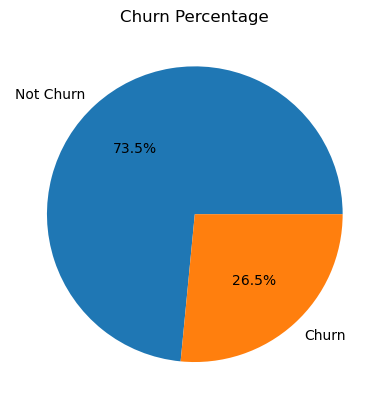

In [610]:
# Visualize churn percentage
churn_count = df['Churn'].value_counts()
churn_pct = churn_count / len(df) * 100
churn_pct

# Create pie chart
fig, ax = plt.subplots()
ax.pie(churn_pct, labels=['Not Churn', 'Churn'], autopct='%1.1f%%')
ax.set_title('Churn Percentage')

# Show the plot
plt.show()

# 3.Data Resampling

In [611]:
# Convert categorical columns to numeric using LabelEncoder
le = LabelEncoder()
df_encoded = df.apply(lambda x: le.fit_transform(x) if x.dtype == 'object' else x)


In [612]:
# Separate features and target variable
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']


In [613]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6938,0,0,1,1,67,1,2,0,0,0,2,2,0,2,2,1,0,69.90,4615.90
6939,1,0,0,0,35,1,0,1,2,0,0,2,0,2,1,1,2,89.20,3251.30
6940,0,0,1,1,72,0,1,0,2,2,2,2,0,2,2,0,1,55.65,3880.05
6941,0,0,1,1,61,0,1,0,2,2,0,2,0,2,1,1,0,50.70,3088.75


In [614]:
y.value_counts()

0    5093
1    1839
Name: Churn, dtype: int64

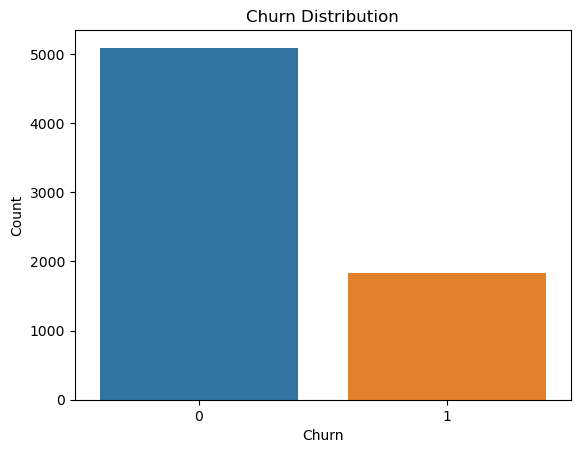

In [615]:
# Plot the distribution of the target variable Churn in before apply resampling
sns.countplot(x="Churn", data=df_encoded)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

In [616]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['Churn'])

# Concatenate features and target variable into a single DataFrame
df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)


In [617]:
y_resampled.value_counts()

0    5093
1    5093
Name: Churn, dtype: int64

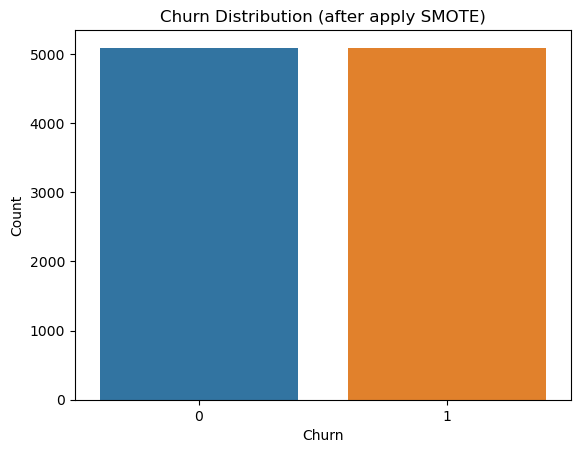

In [618]:
# Plot the distribution of the target variable Churn
sns.countplot(x='Churn', data=df_resampled)
plt.title('Churn Distribution (after apply SMOTE)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


In [619]:
# Split the resampled data into features (X) and target variable (y)
X_resampled = df_resampled.drop(columns=['Churn'])
y_resampled = df_resampled['Churn']

In [620]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (8148, 19)
Shape of X_test: (2038, 19)
Shape of y_train: (8148,)
Shape of y_test: (2038,)


# 4.Model Training and Evaluation

## 4.1.Logistic Regression model

In [621]:
# Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Predictions
y_pred_train_lr = logistic_model.predict(X_train)
y_pred_test_lr = logistic_model.predict(X_test)

# Accuracy and classification report for Logistic Regression
print("Logistic Regression:")
print("Train Accuracy:", accuracy_score(y_train, y_pred_train_lr))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_lr))
print("Classification Report for Test Data:")
print(classification_report(y_test, y_pred_test_lr))

Logistic Regression:
Train Accuracy: 0.7972508591065293
Test Accuracy: 0.7894995093228655
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1003
           1       0.78      0.82      0.80      1035

    accuracy                           0.79      2038
   macro avg       0.79      0.79      0.79      2038
weighted avg       0.79      0.79      0.79      2038



## 4.2.Random Forest model

In [622]:
# Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Predictions
y_pred_train_rf = random_forest_model.predict(X_train)
y_pred_test_rf = random_forest_model.predict(X_test)

# Accuracy and classification report for Random Forest
print("\nRandom Forest:")
print("Train Accuracy:", accuracy_score(y_train, y_pred_train_rf))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_rf))
print("Classification Report for Test Data:")
print(classification_report(y_test, y_pred_test_rf))


Random Forest:
Train Accuracy: 0.9985272459499264
Test Accuracy: 0.845927379784102
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1003
           1       0.85      0.84      0.85      1035

    accuracy                           0.85      2038
   macro avg       0.85      0.85      0.85      2038
weighted avg       0.85      0.85      0.85      2038



In [623]:
y_pred=random_forest_model.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [624]:
y_pred_probs=random_forest_model.predict_proba(X_test)
y_pred_probs #Left side column for 0 and right side column for 1

array([[0.43, 0.57],
       [0.66, 0.34],
       [0.7 , 0.3 ],
       ...,
       [1.  , 0.  ],
       [0.93, 0.07],
       [0.81, 0.19]])

In [625]:
# Calculate confusion matrix for test data
conf_matrix_rf = confusion_matrix(y_test, y_pred_test_rf)
conf_matrix_rf

array([[854, 149],
       [165, 870]], dtype=int64)

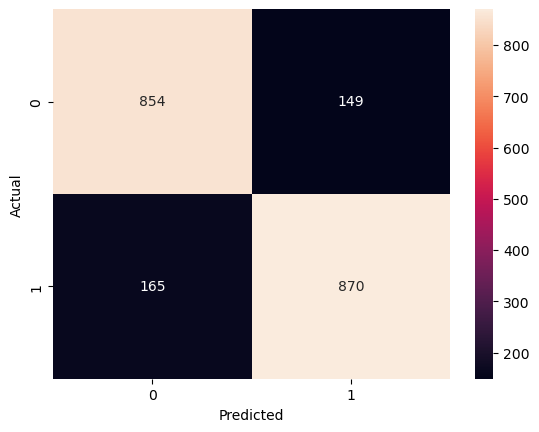

In [626]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 4.2.1.Evaluate performance

In [627]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rf_mse = mean_squared_error(y_test, y_pred_test_rf)

rf_mae = mean_absolute_error(y_test, y_pred_test_rf)

rf_r2 = r2_score(y_test, y_pred_test_rf)

# Print the results
print("Random Forest Model:")
print("Mean Squared Error:", rf_mse)
print("Mean Absolute Error:", rf_mae)
print("R-squared:", rf_r2)

Random Forest Model:
Mean Squared Error: 0.15407262021589793
Mean Absolute Error: 0.15407262021589793
R-squared: 0.38355753994056474


#### 4.1.2.Table of predicted values and test values for the selected samples

In [628]:
# Select 10 random samples
sample_indices = np.random.choice(len(y_test), 10, replace=False)
sample_indices

array([1687,  355,  975, 1176, 1690, 1045,  492,  658, 1073, 1040])

In [629]:
# Get the y_test values for the selected samples
y_test_sample = y_test.iloc[sample_indices]
y_test_sample

1118     1
590      0
9489     1
4209     0
511      1
10179    1
1068     1
3        0
2412     0
789      0
Name: Churn, dtype: int32

In [630]:
# Get the corresponding predictions for the selected samples
rf_sample_predictions = y_pred_test_rf[sample_indices]
rf_sample_predictions

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0])

In [631]:
# Create a DataFrame to store the values
comparison_df = pd.DataFrame({'True Values': y_test_sample, 'Predicted Values': rf_sample_predictions})

# Display the DataFrame
comparison_df


,True Values,Predicted Values
1118,1,0
590,0,0
9489,1,1
4209,0,0
511,1,1
10179,1,1
1068,1,1
3,0,0
2412,0,0
789,0,0


# 4.3.K-Nearest Neighbors (KNN)

In [632]:
from sklearn.neighbors import KNeighborsClassifier

# Convert to NumPy arrays 
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predictions
y_pred_train_knn = knn_model.predict(X_train)
y_pred_test_knn = knn_model.predict(X_test)

# Accuracy and classification report for KNN
print("\nK-Nearest Neighbors:")
print("Train Accuracy:", accuracy_score(y_train, y_pred_train_knn))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_knn))
print("Classification Report for Test Data:")
print(classification_report(y_test, y_pred_test_knn))



K-Nearest Neighbors:
Train Accuracy: 0.843519882179676
Test Accuracy: 0.7703631010794897
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75      1003
           1       0.74      0.84      0.79      1035

    accuracy                           0.77      2038
   macro avg       0.77      0.77      0.77      2038
weighted avg       0.77      0.77      0.77      2038



# 4.4.Decision Tree

In [633]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_train_dt = dt_model.predict(X_train)
y_pred_test_dt = dt_model.predict(X_test)

# Accuracy and classification report for Decision Tree
print("\nDecision Tree:")
print("Train Accuracy:", accuracy_score(y_train, y_pred_train_dt))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_dt))
print("Classification Report for Test Data:")
print(classification_report(y_test, y_pred_test_dt))



Decision Tree:
Train Accuracy: 0.9985272459499264
Test Accuracy: 0.7782139352306182
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      1003
           1       0.79      0.77      0.78      1035

    accuracy                           0.78      2038
   macro avg       0.78      0.78      0.78      2038
weighted avg       0.78      0.78      0.78      2038



# 4.5.Support Vector Machine (SVM)

In [634]:
from sklearn.svm import SVC

# Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)

# Accuracy and classification report for SVM
print("\nSupport Vector Machine:")
print("Train Accuracy:", accuracy_score(y_train, y_pred_train_svm))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test_svm))
print("Classification Report for Test Data:")
print(classification_report(y_test, y_pred_test_svm))



Support Vector Machine:
Train Accuracy: 0.6674030436917034
Test Accuracy: 0.6521099116781158
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.63      0.72      0.67      1003
           1       0.68      0.59      0.63      1035

    accuracy                           0.65      2038
   macro avg       0.66      0.65      0.65      2038
weighted avg       0.66      0.65      0.65      2038

